In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import time
from PIL import Image

In [2]:
models = ['v3_less_epochs', 'v4_wider_deeper', 'v5_dropout', 'v6_charge_segment', 'v7_all_brands', 'v8_all_brands_charge_seg']

model_results = dict()
for model in models:
    dfs = []
    if model == 'v7_all_brands':
        dfs.append(pd.read_csv(f'./models/{model}/results/attempt_1.csv'))
    elif model == 'v8_all_brands_charge_seg':
        dfs.append(pd.read_csv(f'./models/{model}/results/all_brands.csv'))
    else:
        for brand in range(1, 4):
            dfs.append(pd.read_csv(f'./models/{model}/results/brand{brand}.csv'))
    model_results[model] = dfs

In [3]:
# get ROC curve and AUC score for each brand for each model
model_roc = dict()
model_auc = dict()
for model in models:
    roc_curves = []
    auc_scores = []
    for i in range(3):
        y_true = model_results[model][i]['y_test']
        y_pred = model_results[model][i]['y_pred_test']
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_curves.append((fpr, tpr))
        auc_scores.append(roc_auc_score(y_true, y_pred))
        if model in ['v7_all_brands', 'v8_all_brands_charge_seg']:
            break
    model_roc[model] = roc_curves
    model_auc[model] = auc_scores

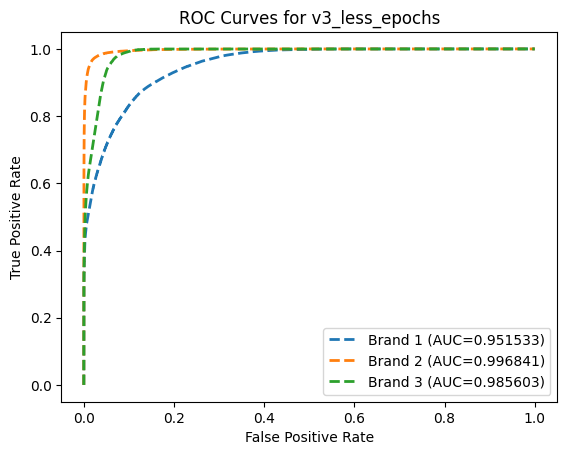

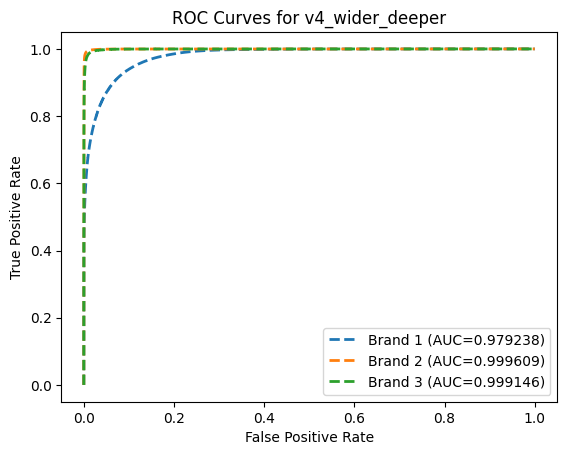

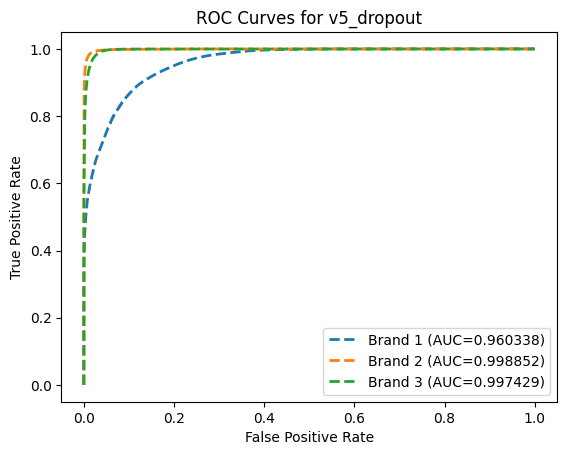

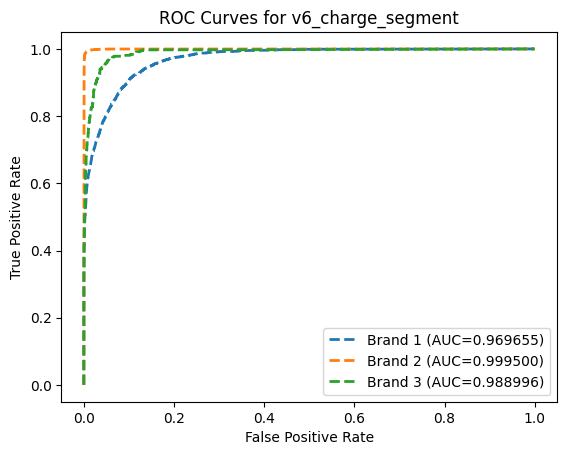

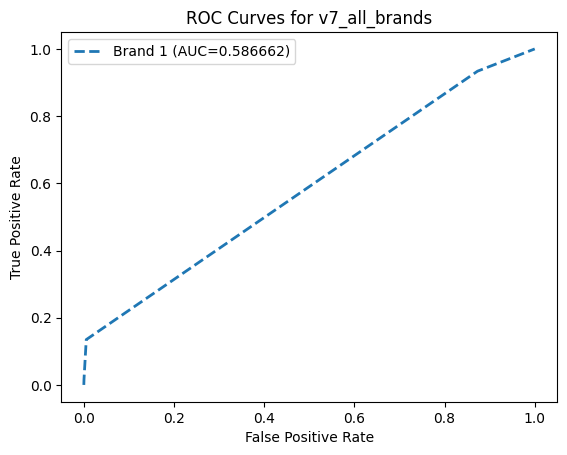

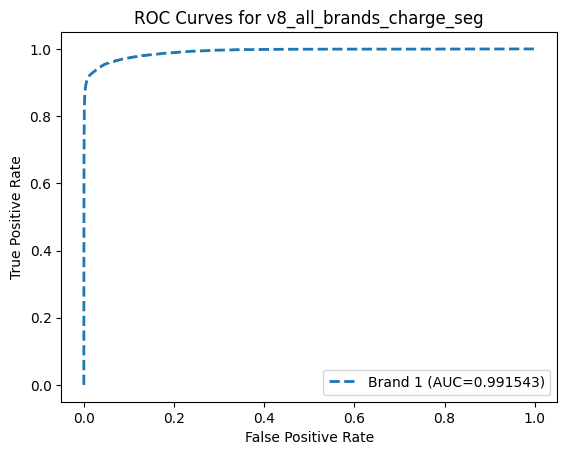

<Figure size 640x480 with 0 Axes>

In [4]:
# plot ROC curves
for model in models:
    roc_scores = model_roc[model]
    auc_scores = model_auc[model]
    for i in range(len(roc_scores)):
        fpr, tpr = model_roc[model][i]
        plt.plot(fpr, tpr, label='Brand {} (AUC={:.6f})'.format(i+1, auc_scores[i]), linewidth=2, linestyle='dashed')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for ' + model)
    plt.legend()

    # crop save plot
    plt.savefig(f'./models/{model}/results/roc_{model}.png')
    plt.show()
    plt.clf()